In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
cars = pd.read_csv('output_Apr-27-2024_cleaned.csv')
                #    names=["Title","Miles","Price","Deal","Year","Make","Model"])

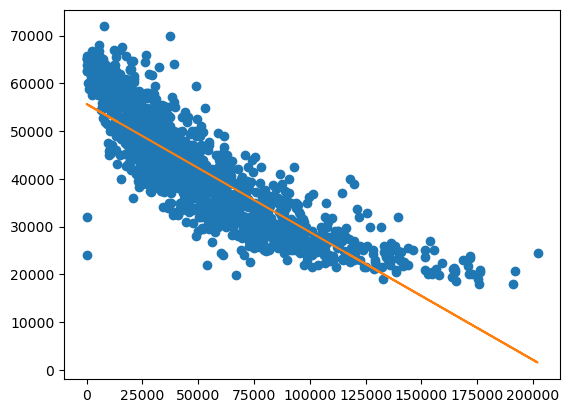

In [4]:
plt.plot(cars['Miles'], cars['Price'], 'o')
m, b = np.polyfit(cars['Miles'], cars['Price'], 1)
plt.plot(cars['Miles'], m*cars['Miles']+b)

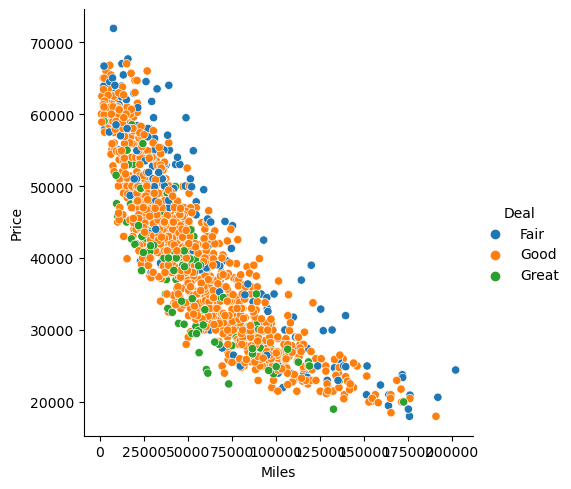

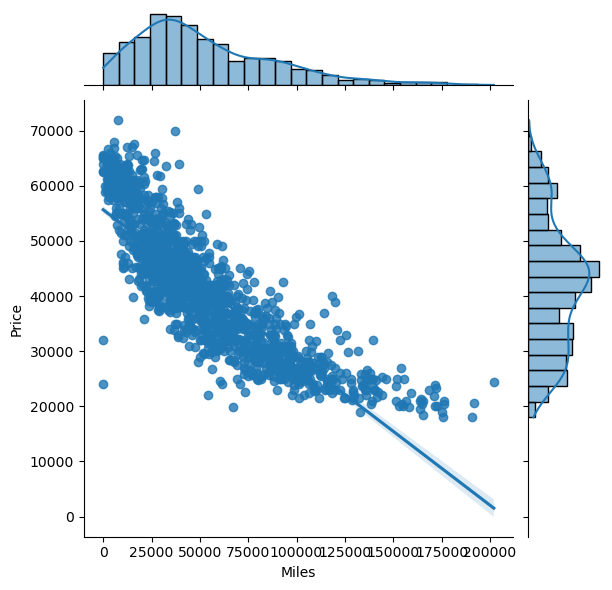

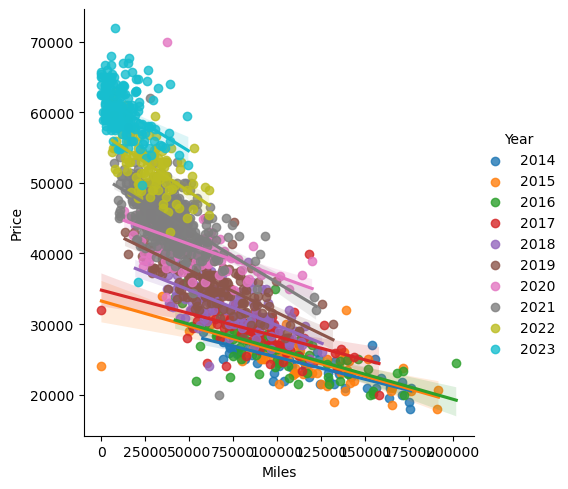

In [5]:
#create scatterplot with regression line and confidence interval lines
sns.relplot(data=cars, x='Miles', y='Price', hue="Deal")

sns.jointplot(data=cars, x='Miles', y='Price', kind="reg")

sns.lmplot( data=cars, x='Miles', y='Price', hue="Year")

In [6]:
x = np.array(cars['Miles']).reshape((-1, 1))
y = np.array(cars['Price'])

model = LinearRegression().fit(x, y)

print(f"R^2: {model.score(x, y)}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

R^2: 0.7286919644381367
intercept: 55647.165331897515
slope: [-0.26791897]
